# 갭마인더 데이터 집합 불러오기

In [1]:
import pandas as pd
df = pd.read_csv('../data/gapminder.tsv', sep='\t')

# 불러온 데이터 집합 살펴보기

In [2]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [6]:
df.shape

(1704, 6)

In [7]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [8]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

# 열 단위로 데이터 추출하기

In [10]:
country_df = df['country']
type(country_df)

pandas.core.series.Series

In [11]:
subset_df = df[['country', 'year','pop']]
subset_df.head(1)

,country,year,pop
0,Afghanistan,1952,8425333


In [13]:
df.loc([0], axis=1)

TypeError: __call__() got multiple values for argument 'axis'

# loc 속성으로 행 단위 데이터 추출하기

In [16]:
df.loc[[0,99,2]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


# tail과 loc는 조금 달라요!

In [17]:
df.tail(1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


# iloc 속성으로 행 단위 데이터 추출하기

In [19]:
df.iloc[[1,2]]

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.85303
2,Afghanistan,Asia,1962,31.997,10267083,853.10071


# 파이썬 슬라이싱 구문을 조합하여 원하는 데이터 추출하기

In [24]:
df.loc[:,['year','continent']].head(1)

,year,continent
0,1952,Asia


# iloc 속성과 range 메서드로 원하는 데이터 추출하기

# 열 지정값에 파이썬 슬라이싱을 사용하여 원하는 데이터 추출하기

# loc, iloc 자유자재로 사용하기

In [27]:
df.loc[[0,3,6],['year','continent']]

,year,continent
0,1952,Asia
3,1967,Asia
6,1982,Asia


# 그룹화한 데이터의 평균 구하기

In [28]:
df.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [35]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

# 그룹화한 데이터의 개수 세어보기

In [38]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

# 그래프 만들기

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
global_yeary = df.groupby('year')['lifeExp'].mean()

In [42]:
global_yeary

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

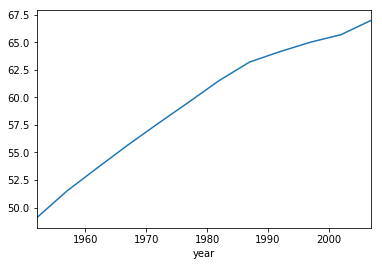

In [43]:
global_yeary.plot()